In [29]:
import pandas as pd

gru_df = pd.read_csv("gru_avg_50.csv")
lstm_df = pd.read_csv("lstm_avg_50.csv")
tkan_df = pd.read_csv("tkan_avg_50.csv")
tcn_df = pd.read_csv('tcn_avg_50.csv')

# **Sort dataset**

In [30]:
sort_order = ['ws7', 'ws15', 'ws30']

def sort_df(df):
    return (
        df.assign(
            ws_prefix=lambda x: pd.Categorical(
                x['dataset'].str.extract(r'^(ws\d+)')[0],
                categories=sort_order,
                ordered=True
            )
        )
        .sort_values(['ws_prefix', 'dataset'])
        .drop(columns=['ws_prefix'])
    )

# áp dụng cho 4 df
gru_df  = sort_df(gru_df).reset_index()
lstm_df = sort_df(lstm_df).reset_index()
tkan_df = sort_df(tkan_df).reset_index()
tcn_df  = sort_df(tcn_df).reset_index()

In [31]:
datasets = gru_df['dataset'].to_list()

mae_gru = gru_df['mae'].to_list()
mape_gru = gru_df['mape'].to_list()
time_gru = gru_df['training_time'].to_list()

mae_lstm = lstm_df['mae'].to_list()
mape_lstm = lstm_df['mape'].to_list()
time_lstm = lstm_df['training_time'].to_list()

mae_tkan = tkan_df['mae'].to_list()
mape_tkan = tkan_df['mape'].to_list()
time_tkan = tkan_df['training_time'].to_list()

mae_tcn = tcn_df['mae'].to_list()
mape_tcn = tcn_df['mape'].to_list()
time_tcn = tcn_df['training_time'].to_list()

# Calculate mean, std

In [33]:
# cho tkan_df
tkan_stats = tkan_df[['mae', 'mape']].agg(['mean', 'std'])

# cho gru_df
gru_stats = gru_df[['mae', 'mape']].agg(['mean', 'std'])

# hiển thị kết quả
print("TKAN stats:")
print(tkan_stats)

print("\nGRU stats:")
print(gru_stats)


TKAN stats:
           mae      mape
mean  2.812731  8.733611
std   0.816646  2.446336

GRU stats:
           mae      mape
mean  2.813572  8.700189
std   0.828646  2.463565


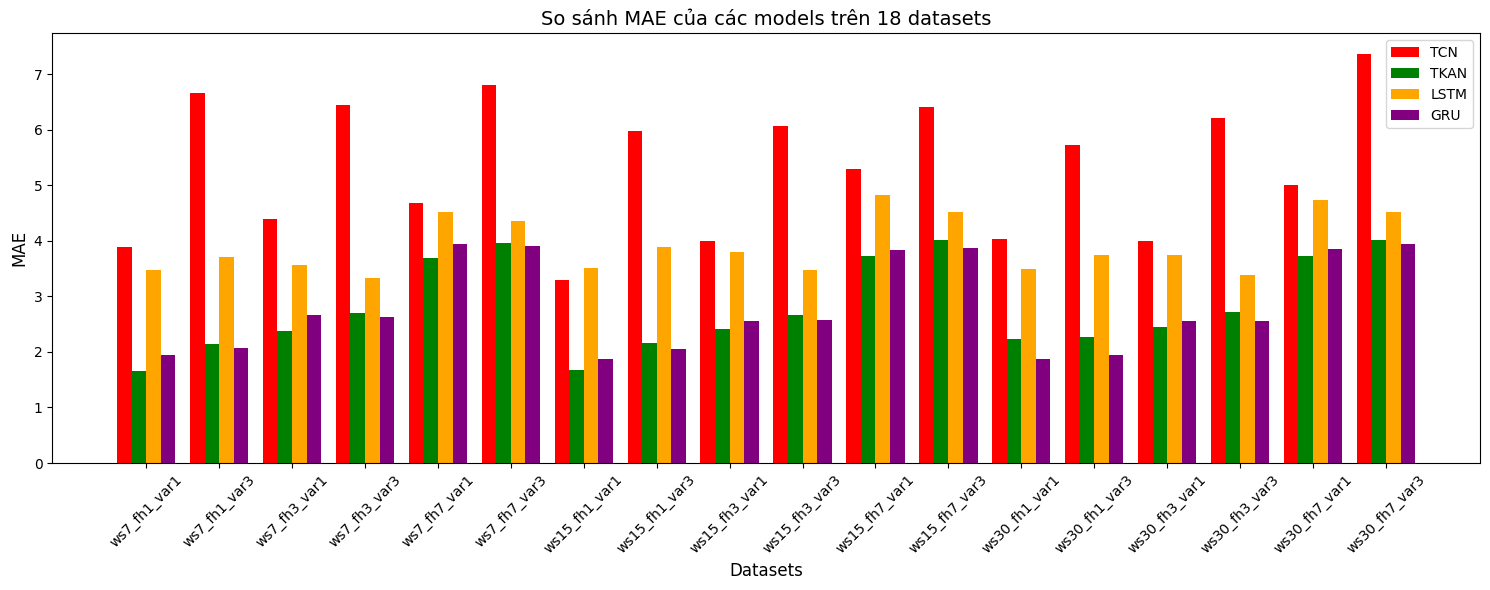

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(datasets))  # vị trí trên trục X
width = 0.2  # độ rộng cột

plt.figure(figsize=(15,6))
plt.bar(x - 1.5*width, mae_tcn, width, label='TCN', color='red')
plt.bar(x - 0.5*width, mae_tkan, width, label='TKAN', color='green')
plt.bar(x + 0.5*width, mae_lstm, width, label='LSTM', color='orange')
plt.bar(x + 1.5*width, mae_gru, width, label='GRU', color='purple')

plt.xlabel("Datasets", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.title("So sánh MAE của các models trên 18 datasets", fontsize=14)
plt.xticks(x, datasets, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


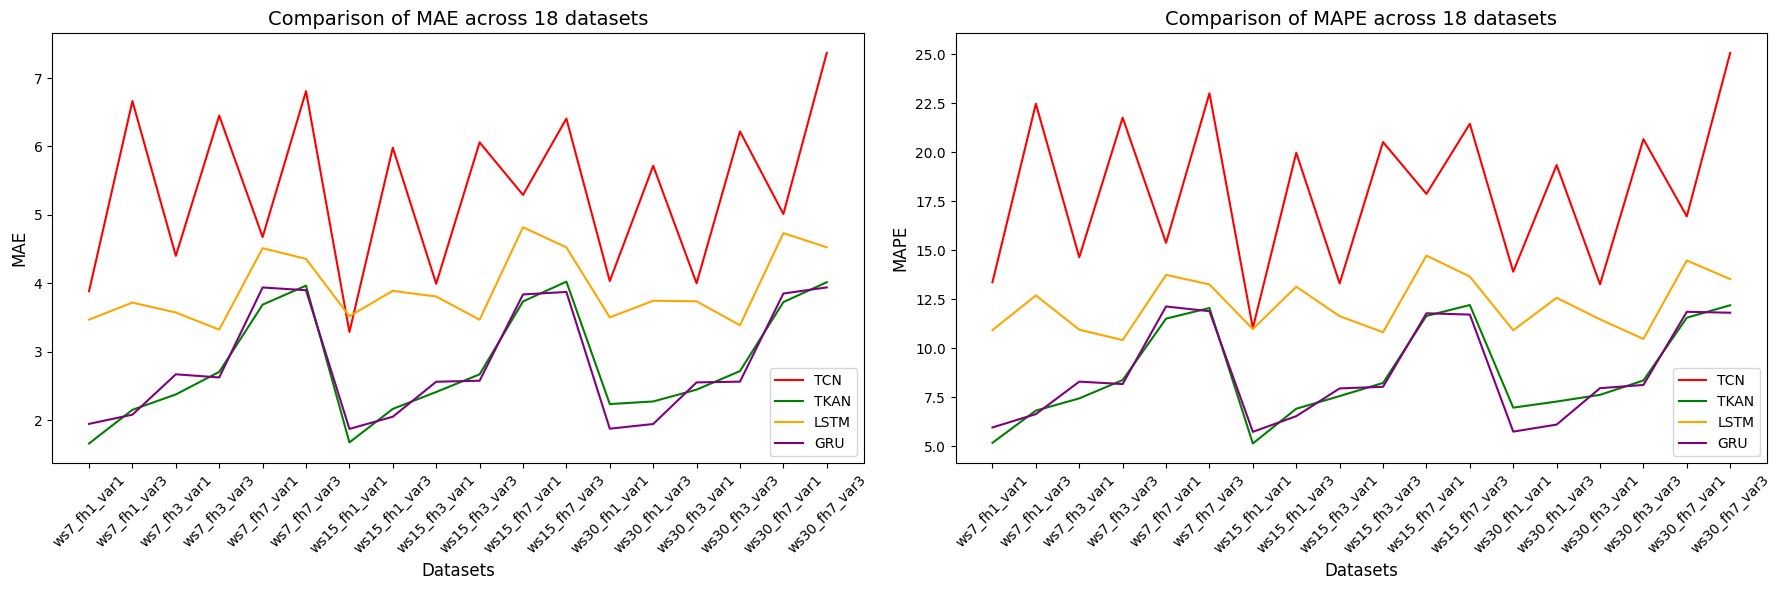

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# --- Subplot 1: MAE ---
axes[0].plot(datasets, mae_tcn, label='TCN', color='red')
axes[0].plot(datasets, mae_tkan, label='TKAN', color='green')
axes[0].plot(datasets, mae_lstm, label='LSTM', color='orange')
axes[0].plot(datasets, mae_gru, label='GRU', color='purple')
axes[0].set_xlabel("Datasets", fontsize=12)
axes[0].set_ylabel("MAE", fontsize=12)
axes[0].set_title("Comparison of MAE across 18 datasets", fontsize=14)
axes[0].legend()
axes[0].grid(False)
axes[0].tick_params(axis='x', rotation=45)

# --- Subplot 2: MAPE ---
axes[1].plot(datasets, mape_tcn, label='TCN', color='red')
axes[1].plot(datasets, mape_tkan, label='TKAN', color='green')
axes[1].plot(datasets, mape_lstm, label='LSTM', color='orange')
axes[1].plot(datasets, mape_gru, label='GRU', color='purple')
axes[1].set_xlabel("Datasets", fontsize=12)
axes[1].set_ylabel("MAPE", fontsize=12)
axes[1].set_title("Comparison of MAPE across 18 datasets", fontsize=14)
axes[1].legend()
axes[1].grid(False)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("comparison_mae_mape_side_by_side.png", dpi=300, bbox_inches="tight")
plt.show()



# Window size plot


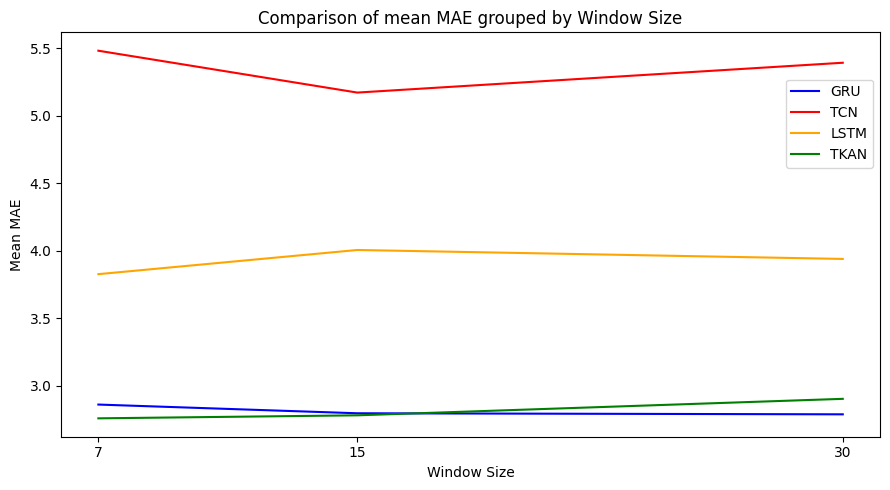

In [ ]:
def extract_ws(x):
    return int(x.split("_")[0].replace("ws", ""))

for df in [gru_df, tcn_df, lstm_df, tkan_df]:
    df["window_size"] = df["dataset"].apply(extract_ws)

gru_mean   = gru_df.groupby("window_size")["mae"].mean()
tcn_mean  = tcn_df.groupby("window_size")["mae"].mean()
lstm_mean = lstm_df.groupby("window_size")["mae"].mean()
tkan_mean  = tkan_df.groupby("window_size")["mae"].mean()
                                            
plt.figure(figsize=(9,5))
plt.plot(gru_mean.index, gru_mean.values, '-', label="GRU", color='blue')
plt.plot(tcn_mean.index, tcn_mean.values, '-', label="TCN", color='red')
plt.plot(lstm_mean.index, lstm_mean.values, '-', label="LSTM", color='orange')
plt.plot(tkan_mean.index, tkan_mean.values, '-', label="TKAN", color='green')

plt.xlabel("Window Size")
plt.xticks([7, 15, 30])
plt.ylabel("Mean MAE")
plt.title("Comparison of mean MAE grouped by Window Size")
plt.legend()
plt.grid(False)
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.savefig("mae_mean_ws.png", dpi=300, bbox_inches="tight")

plt.show()

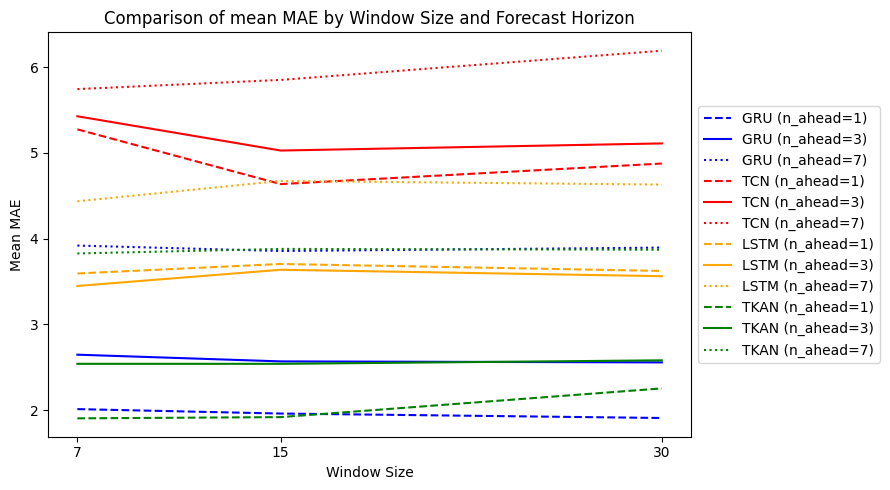

In [62]:
import matplotlib.pyplot as plt

# Danh sách các model và màu sắc
models = {
    "GRU": ("blue", gru_df),
    "TCN": ("red", tcn_df),
    "LSTM": ("orange", lstm_df),
    "TKAN": ("green", tkan_df),
}

# Kiểu line cho từng n_ahead
line_styles = {
    1: "--",   # nét đứt
    3: "-",    # nét liền
    7: ":",    # nét chấm chấm
}

plt.figure(figsize=(9, 5))

for model_name, (color, df) in models.items():
    # Tính mean theo ws và n_ahead
    mean_df = df.groupby(["ws", "n_ahead"])["mae"].mean().reset_index()

    for n_ahead, style in line_styles.items():
        subset = mean_df[mean_df["n_ahead"] == n_ahead]
        if not subset.empty:
            plt.plot(
                subset["ws"], subset["mae"],
                linestyle=style, color=color,
                label=f"{model_name} (n_ahead={n_ahead})"
            )

plt.xlabel("Window Size")
plt.xticks([7, 15, 30])
plt.ylabel("Mean MAE")
plt.title("Comparison of mean MAE by Window Size and Forecast Horizon")
# plt.legend(loc="upper right", bbox_to_anchor=(1, 0.95))
plt.legend(
    loc="center left",      # vị trí bám vào (bên trái, giữa trục Y)
    bbox_to_anchor=(1, 0.5) # dịch ra ngoài, 1 = mép phải, 0.5 = giữa chiều cao
)
plt.grid(False)

plt.tight_layout()
plt.savefig("mae_mean_ws_n_ahead.png", dpi=300, bbox_inches="tight")
plt.show()



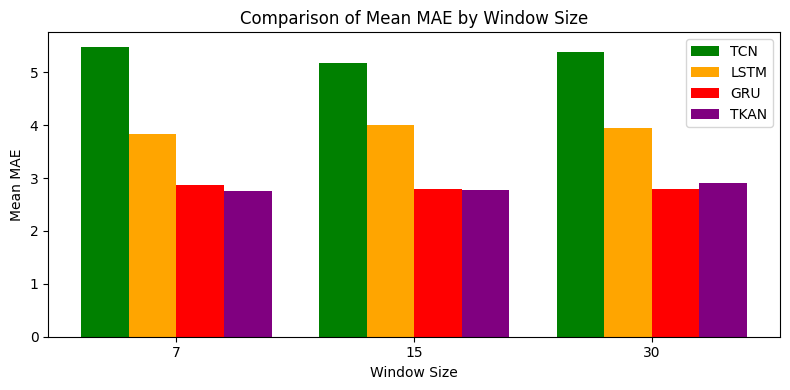

In [46]:
import numpy as np

# Gom dữ liệu vào cùng một DataFrame
mean_df = pd.DataFrame({
    "TCN": tcn_mean,
    "LSTM": lstm_mean,
    "GRU": gru_mean,
    "TKAN": tkan_mean
})

x = np.arange(len(mean_df.index))  # vị trí window size
width = 0.2  # độ rộng mỗi cột

plt.figure(figsize=(8,4))
plt.bar(x - 1.5*width, mean_df["TCN"],  width, label="TCN", color='green')
plt.bar(x - 0.5*width, mean_df["LSTM"], width, label="LSTM", color='orange')
plt.bar(x + 0.5*width, mean_df["GRU"],  width, label="GRU", color='red')
plt.bar(x + 1.5*width, mean_df["TKAN"], width, label="TKAN", color='purple')

plt.xticks(x, mean_df.index)
plt.xlabel("Window Size")
plt.ylabel("Mean MAE")
plt.title("Comparison of Mean MAE by Window Size")
plt.legend()
plt.tight_layout()
plt.savefig("mae_mean_ws_bar.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 800x500 with 0 Axes>

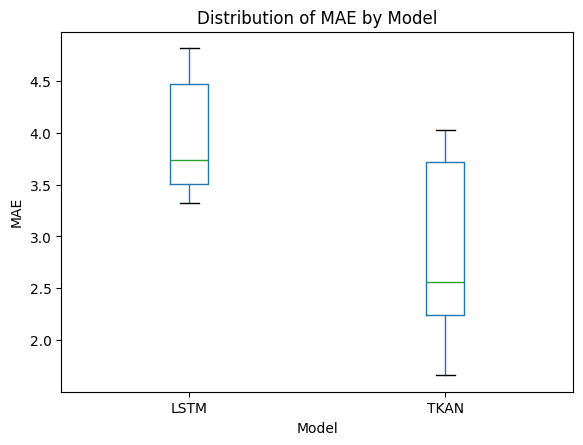

In [48]:
# Gộp lại thành một DataFrame
all_df = pd.concat([gru_df, tcn_df, lstm_df, tkan_df], ignore_index=True)

plt.figure(figsize=(8,5))
all_df.boxplot(column="mae", by="model", grid=False)

plt.title("Distribution of MAE by Model")
plt.suptitle("")  # bỏ tiêu đề mặc định của pandas boxplot
plt.xlabel("Model")
plt.ylabel("MAE")

plt.savefig("mae_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

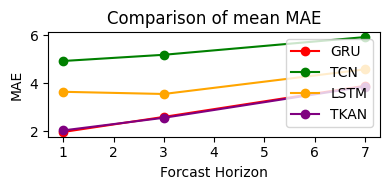

In [22]:
def extract_fh(x):
    return int([p for p in x.split("_") if p.startswith("fh")][0].replace("fh", ""))

for df in [gru_df, tcn_df, lstm_df, tkan_df]:
    df["forcast_horizon"] = df["dataset"].apply(extract_fh)

gru_mean   = gru_df.groupby("forcast_horizon")["mae"].mean()
tcn_mean  = tcn_df.groupby("forcast_horizon")["mae"].mean()
lstm_mean = lstm_df.groupby("forcast_horizon")["mae"].mean()
tkan_mean  = tkan_df.groupby("forcast_horizon")["mae"].mean()

plt.figure(figsize=(4,2))
plt.plot(gru_mean.index, gru_mean.values, '-o', label="GRU", color='red')
plt.plot(tcn_mean.index, tcn_mean.values, '-o', label="TCN", color='green')
plt.plot(lstm_mean.index, lstm_mean.values, '-o', label="LSTM", color='orange')
plt.plot(tkan_mean.index, tkan_mean.values, '-o', label="TKAN", color='purple')

plt.xlabel("Forcast Horizon")
plt.ylabel("MAE")
plt.title("Comparison of mean MAE")
plt.legend()
plt.grid(False)
plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig("mae_mean_fh.png", dpi=300, bbox_inches="tight")

plt.show()

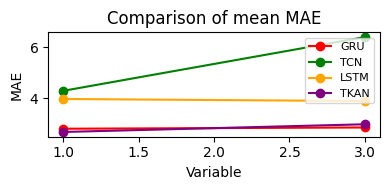

In [23]:
def extract_var(x):
    return int([p for p in x.split("_") if p.startswith("var")][0].replace("var", ""))

for df in [gru_df, tcn_df, lstm_df, tkan_df]:
    df["forcast_horizon"] = df["dataset"].apply(extract_var)

gru_mean   = gru_df.groupby("forcast_horizon")["mae"].mean()
tcn_mean  = tcn_df.groupby("forcast_horizon")["mae"].mean()
lstm_mean = lstm_df.groupby("forcast_horizon")["mae"].mean()
tkan_mean  = tkan_df.groupby("forcast_horizon")["mae"].mean()

plt.figure(figsize=(4,2))
plt.plot(gru_mean.index, gru_mean.values, '-o', label="GRU", color='red')
plt.plot(tcn_mean.index, tcn_mean.values, '-o', label="TCN", color='green')
plt.plot(lstm_mean.index, lstm_mean.values, '-o', label="LSTM", color='orange')
plt.plot(tkan_mean.index, tkan_mean.values, '-o', label="TKAN", color='purple')

plt.xlabel("Variable")
plt.ylabel("MAE")
plt.title("Comparison of mean MAE")
plt.legend()
plt.grid(False)
plt.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.savefig("mae_mean_var.png", dpi=300, bbox_inches="tight")

plt.show()